# Classification of Skin Cancer: Malignant vs Benign using Deep Learning


### we used opencv for preproccesing the image dataset
### we used tensorflow and keras libarary for machine learning stuff 

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import optimizers
import argparse
from imutils import paths
import np_utils



### first we set the image dataset directory and define the categories 

In [2]:
datadir='C:/Users/Acer/Desktop/DataScience-ML& DL Model/Traning Dataset -SkinDoc'
categories = ['benign','malignant']

### using the opencv, we read images from dataset directory and resize images to 96*96
### then insert the resized image with class lable to array

In [3]:
training_data=[]
def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(96,96))
                training_data.append([new_array,class_num])
            except Exception as e:    
                pass
create_training_data() 

###  append features and labels to separated list
### then convert the feature array into a NumPy array and reshape the array

In [4]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(3297,96,96,3)
x.shape

(3297, 96, 96, 3)

### partition the data into training and testing splits using 80% of the data for training and the remaining 20% for testing

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### then preprocess dataset by scaling all pixel intensities to the range [0, 1]

In [6]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

### encode the labels (which are currently strings) as integers and then one-hot encode them

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

### import VGG19 model (for Transfer learning)

In [8]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (96, 96, 3))



### first we iterate through the model and make 20 layer non-trainable
### then add pooling layer and add some dense layers with relu activation
### we used categorical_crossentropy loss function and Adam as the optimizer

In [9]:
for layer in model.layers[:20]:
    layer.trainable = False
x = model.output
x =  tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2048, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
predictions = tf.keras.layers.Dense(2, activation="softmax")(x)   
model_final = tf.keras.models.Model(model.input,predictions)
model_final.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

    

### then we fit the dataset to train

In [12]:
history=model_final.fit(x_train, y_train,
          batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 2637 samples, validate on 660 samples
Epoch 1/50
2637/2637 [==============================] - 181s 69ms/sample - loss: 0.6113 - accuracy: 0.6610 - val_loss: 0.4072 - val_accuracy: 0.7833
Epoch 2/50
2637/2637 [==============================] - 191s 73ms/sample - loss: 0.3803 - accuracy: 0.8142 - val_loss: 0.4451 - val_accuracy: 0.8136
Epoch 3/50
2637/2637 [==============================] - 198s 75ms/sample - loss: 0.3611 - accuracy: 0.8335 - val_loss: 0.3711 - val_accuracy: 0.8136
Epoch 4/50
2637/2637 [==============================] - 181s 69ms/sample - loss: 0.3245 - accuracy: 0.8476 - val_loss: 0.4027 - val_accuracy: 0.8379
Epoch 5/50
2637/2637 [==============================] - 177s 67ms/sample - loss: 0.3042 - accuracy: 0.8559 - val_loss: 0.4140 - val_accuracy: 0.8076
Epoch 6/50
2637/2637 [==============================] - 190s 72ms/sample - loss: 0.2963 - accuracy: 0.8620 - val_loss: 0.4494 - val_accuracy: 0.8212
Epoch 7/50
2637/2637 [==============================] - 176

### evaluate the model

In [13]:
score = model_final.evaluate(x_test, y_test, verbose=0)

In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5963197578083386
Test accuracy: 0.8424242


### Graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


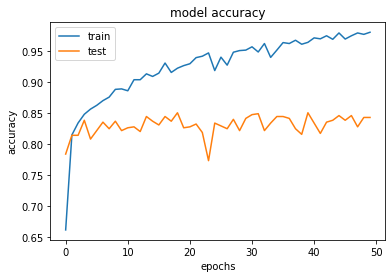

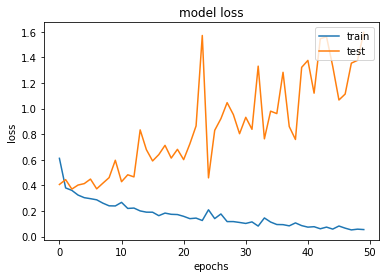

In [15]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### save model

In [ ]:
# model_final.save("model.h5")